<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Preprocess_and_split_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
folder = '/content/drive/MyDrive/My Data/Do_An_Images'

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from imutils import contours
import numpy as np

In [25]:
print(sorted(os.listdir(folder)))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [24]:
list_img = sorted(os.listdir(folder))
len(list_img)

89

In [6]:
FJoin = os.path.join

In [7]:
char_link = [FJoin(folder, f) for f in list_img]
print(char_link)
print(len(char_link))

['/content/drive/MyDrive/My Data/Do_An_Images/a', '/content/drive/MyDrive/My Data/Do_An_Images/à', '/content/drive/MyDrive/My Data/Do_An_Images/á', '/content/drive/MyDrive/My Data/Do_An_Images/â', '/content/drive/MyDrive/My Data/Do_An_Images/ầ', '/content/drive/MyDrive/My Data/Do_An_Images/ấ', '/content/drive/MyDrive/My Data/Do_An_Images/ẫ', '/content/drive/MyDrive/My Data/Do_An_Images/ẩ', '/content/drive/MyDrive/My Data/Do_An_Images/ã', '/content/drive/MyDrive/My Data/Do_An_Images/ă', '/content/drive/MyDrive/My Data/Do_An_Images/ằ', '/content/drive/MyDrive/My Data/Do_An_Images/ắ', '/content/drive/MyDrive/My Data/Do_An_Images/ẵ', '/content/drive/MyDrive/My Data/Do_An_Images/ẳ', '/content/drive/MyDrive/My Data/Do_An_Images/ả', '/content/drive/MyDrive/My Data/Do_An_Images/ạ', '/content/drive/MyDrive/My Data/Do_An_Images/ậ', '/content/drive/MyDrive/My Data/Do_An_Images/ặ', '/content/drive/MyDrive/My Data/Do_An_Images/b', '/content/drive/MyDrive/My Data/Do_An_Ima

#**Đưa ảnh về dạng trắng đen**

In [ ]:
def preprocess(img):
    blur = cv2.GaussianBlur(img,(7,7),0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,7,7)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    x_min = 10**9
    x_max = 0
    y_min = 10**9
    y_max = 0

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if cv2.contourArea(cnt) > 0:
            # x_max, y_max, w_max, h_max = x, y, w, h
            # max = cv2.contourArea(cnt)
            x_min = min(x_min, x)
            y_min = min(y_min, y)

            if x + w > x_max:
                x_max = x + w

            if y + h > y_max:
                y_max = y + h

    table = thresh[y_min: y_max, x_min:x_max]
    return table

In [ ]:
# Chuyển ảnh về trắng đen
for link in char_link:
  lst_link_img = [FJoin(link, img_link) for img_link in os.listdir(link)]
  for img_link in lst_link_img:
    #link_to_put = FJoin(link, name_img)
    img = cv2.imread(img_link, 0)
    img = preprocess(img)
    try:
      cv2.imwrite(img_link, img)
    except:
      continue

# Duyệt tất cả các ảnh để đổi tên lại theo thứ tự

In [ ]:
for link in char_link:
  lst_name_img = os.listdir(link)
  for index ,name_img in enumerate(lst_name_img):
    os.chdir(link)
    os.rename(name_img, 'picture_' + str(index) + '.jpg')

# Duyệt tất cả các ảnh để lấy và thống kê kích thước của các ảnh


In [96]:
size_img = []
count = 0
for link in char_link:
  lst_link_img = [FJoin(link, img_link) for img_link in os.listdir(link)]
  for img_link in lst_link_img:
    img = Image.open(img_link)
    if (img.size)[0] < 14 or (img.size)[1] < 16:
      os.remove(img_link)
    else:
      size_img.append(img.size)  

In [97]:
print(size_img)
print(len(size_img))

[(44, 41), (51, 41), (50, 43), (50, 32), (47, 43), (45, 37), (58, 38), (54, 54), (55, 36), (62, 44), (44, 33), (47, 41), (33, 40), (51, 35), (56, 33), (49, 33), (49, 38), (47, 40), (53, 36), (54, 39), (45, 36), (30, 42), (47, 40), (48, 57), (49, 35), (45, 36), (44, 37), (46, 34), (45, 36), (49, 42), (49, 33), (49, 40), (51, 42), (52, 34), (41, 33), (44, 36), (42, 31), (51, 33), (51, 34), (51, 31), (38, 29), (37, 34), (38, 36), (37, 30), (34, 31), (49, 32), (39, 33), (36, 31), (38, 34), (41, 29), (36, 31), (27, 23), (32, 37), (39, 33), (25, 25), (27, 27), (36, 27), (20, 29), (29, 36), (30, 23), (28, 32), (37, 20), (28, 26), (33, 19), (31, 21), (35, 19), (32, 23), (31, 22), (21, 20), (20, 23), (37, 20), (31, 27), (33, 18), (29, 25), (30, 26), (27, 23), (42, 48), (32, 21), (27, 27), (35, 21), (30, 23), (34, 21), (32, 49), (28, 26), (30, 25), (34, 20), (34, 19), (33, 24), (27, 24), (27, 25), (27, 24), (37, 20), (39, 20), (33, 22), (34, 22), (33, 20), (27, 23), (38, 29), (30, 31), (41, 27),

In [98]:
df = pd.DataFrame(size_img, columns=['width', 'height'])
df.describe()

,width,height
count,25969.000000,25969.000000
mean,36.793446,53.027956
std,11.629011,14.281853
min,14.000000,16.000000
25%,29.000000,44.000000
50%,35.000000,53.000000
75%,43.000000,62.000000
max,100.000000,100.000000


* Chiều dài nhỏ nhất của ảnh: 16
* Chiều rộng nhỏ nhất của ảnh: 14

#**Resize tất cả ảnh về kích thước nhỏ nhất**

(40, 71)


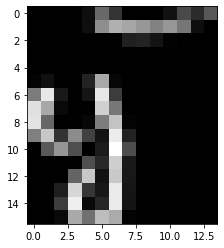

In [81]:
'''
link_a_img = os.listdir(char_link[85])
img = Image.open(FJoin(char_link[85], link_a_img[30]))
print(img.size)
img = img.resize((14, 16))
plt.imshow(img, cmap = 'gray')
'''

In [100]:
for link in char_link:
  lst_link_img = [FJoin(link, img_link) for img_link in os.listdir(link)]
  for img_link in lst_link_img:
    img = Image.open(img_link)
    img = img.resize((14,16))
    img.save(img_link)

#**Phân chia tập train và validation**

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
index = 0
link_train = {}
link_val = {}

label_train = []
label_val = []

for f in char_link:
    list_img_link = [img_link for img_link in os.listdir(f)]
    labels= [index] * len(list_img_link)
    train, validation , train_label, val_label = train_test_split(list_img_link, labels, test_size = 0.2, random_state= 30)

    link_train[index] = []
    link_val[index] = []
    for i, j in zip(train, train_label):
        link_train[index].append(i)
        label_train.append(j)
        
    for i, j in zip(validation, val_label):
        link_val[index].append(i)
        label_val.append(j) 
    print(index, len(train), len(val_label))
    index += 1

In [31]:
print(link_train)
print(label_train)
print(link_val)
print(label_train)

{0: ['picture_223.jpg', 'picture_50.jpg', 'picture_36.jpg', 'picture_86.jpg', 'picture_61.jpg', 'picture_218.jpg', 'picture_107.jpg', 'picture_206.jpg', 'picture_59.jpg', 'picture_29.jpg', 'picture_3.jpg', 'picture_151.jpg', 'picture_122.jpg', 'picture_108.jpg', 'picture_181.jpg', 'picture_64.jpg', 'picture_137.jpg', 'picture_195.jpg', 'picture_6.jpg', 'picture_126.jpg', 'picture_129.jpg', 'picture_18.jpg', 'picture_2.jpg', 'picture_127.jpg', 'picture_13.jpg', 'picture_1.jpg', 'picture_176.jpg', 'picture_188.jpg', 'picture_4.jpg', 'picture_142.jpg', 'picture_194.jpg', 'picture_73.jpg', 'picture_42.jpg', 'picture_100.jpg', 'picture_103.jpg', 'picture_33.jpg', 'picture_96.jpg', 'picture_156.jpg', 'picture_38.jpg', 'picture_93.jpg', 'picture_70.jpg', 'picture_219.jpg', 'picture_76.jpg', 'picture_147.jpg', 'picture_81.jpg', 'picture_145.jpg', 'picture_111.jpg', 'picture_60.jpg', 'picture_14.jpg', 'picture_32.jpg', 'picture_53.jpg', 'picture_115.jpg', 'picture_104.jpg', 'picture_44.jpg', 'p

In [19]:
train_folder = '/content/drive/My Drive/My Data/Train'
train_folder_character = [FJoin(train_folder, f) for f in list_img]
print(train_folder_character)

['/content/drive/My Drive/My Data/Train/a', '/content/drive/My Drive/My Data/Train/à', '/content/drive/My Drive/My Data/Train/á', '/content/drive/My Drive/My Data/Train/â', '/content/drive/My Drive/My Data/Train/ầ', '/content/drive/My Drive/My Data/Train/ấ', '/content/drive/My Drive/My Data/Train/ẫ', '/content/drive/My Drive/My Data/Train/ẩ', '/content/drive/My Drive/My Data/Train/ã', '/content/drive/My Drive/My Data/Train/ă', '/content/drive/My Drive/My Data/Train/ằ', '/content/drive/My Drive/My Data/Train/ắ', '/content/drive/My Drive/My Data/Train/ẵ', '/content/drive/My Drive/My Data/Train/ẳ', '/content/drive/My Drive/My Data/Train/ả', '/content/drive/My Drive/My Data/Train/ạ', '/content/drive/My Drive/My Data/Train/ậ', '/content/drive/My Drive/My Data/Train/ặ', '/content/drive/My Drive/My Data/Train/b', '/content/drive/My Drive/My Data/Train/c', '/content/drive/My Drive/My Data/Train/d', '/content/drive/My Drive/My Data/Train/e', '/content/drive/My Drive/M

In [20]:
for f in train_folder_character:
    os.makedirs(f)

In [21]:
for i in range(89): #duyet tat ca class
    list_img = [FJoin(char_link[i], f) for f in link_train[i]] # lay link nhung anh dung de train
    save_path = [FJoin(train_folder_character[i],f) for f in link_train[i]]
    for link_open, link_save in zip(list_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)

In [28]:
val_folder = '/content/drive/My Drive/My Data/Validation'
val_folder_character = [FJoin(val_folder, f) for f in list_img]
print(val_folder_character)

['/content/drive/My Drive/My Data/Validation/a', '/content/drive/My Drive/My Data/Validation/à', '/content/drive/My Drive/My Data/Validation/á', '/content/drive/My Drive/My Data/Validation/â', '/content/drive/My Drive/My Data/Validation/ầ', '/content/drive/My Drive/My Data/Validation/ấ', '/content/drive/My Drive/My Data/Validation/ẫ', '/content/drive/My Drive/My Data/Validation/ẩ', '/content/drive/My Drive/My Data/Validation/ã', '/content/drive/My Drive/My Data/Validation/ă', '/content/drive/My Drive/My Data/Validation/ằ', '/content/drive/My Drive/My Data/Validation/ắ', '/content/drive/My Drive/My Data/Validation/ẵ', '/content/drive/My Drive/My Data/Validation/ẳ', '/content/drive/My Drive/My Data/Validation/ả', '/content/drive/My Drive/My Data/Validation/ạ', '/content/drive/My Drive/My Data/Validation/ậ', '/content/drive/My Drive/My Data/Validation/ặ', '/content/drive/My Drive/My Data/Validation/b', '/content/drive/My Drive/My Data/Validation/c', '/content/dr

In [29]:
for f in val_folder_character:
    os.makedirs(f)


In [32]:
for i in range(89): #duyet tat ca class
    list_val_img = [FJoin(char_link[i], f) for f in link_val[i]] # lay link nhung anh dung de train
    save_path = [FJoin(val_folder_character[i],f) for f in link_val[i]]
    for link_open, link_save in zip(list_val_img, save_path):
        img = Image.open(link_open)
        img.save(link_save)